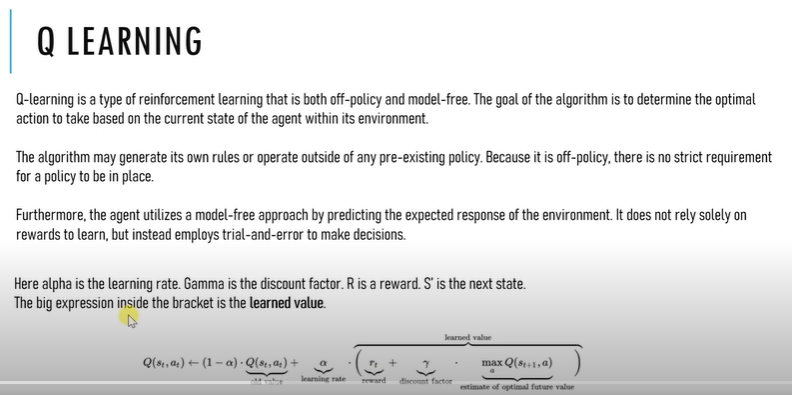

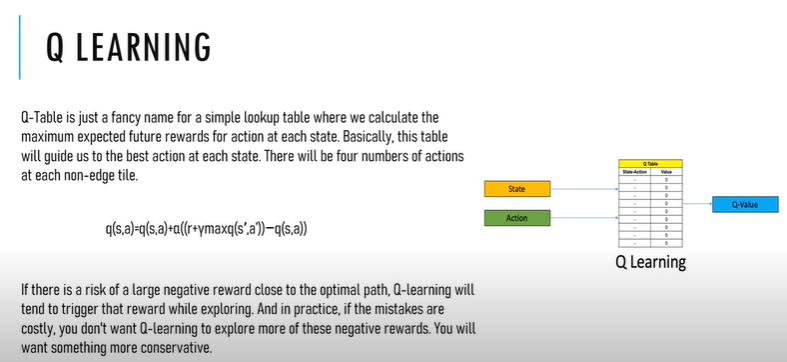
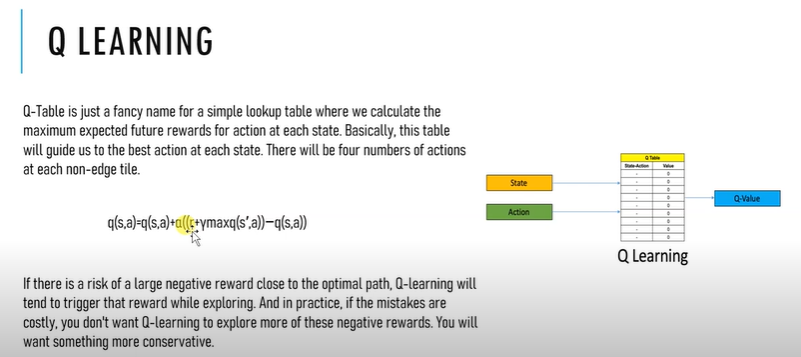

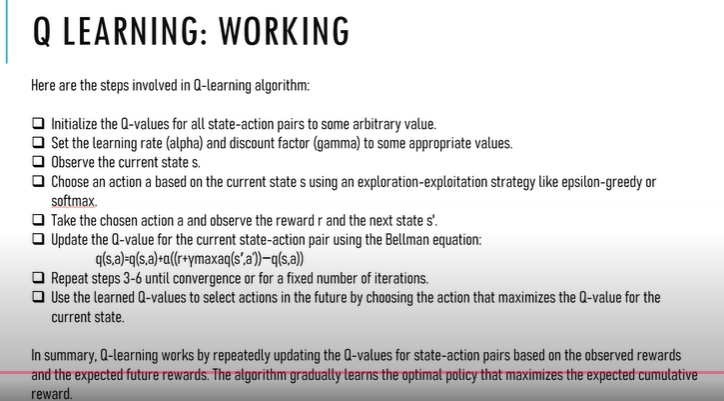
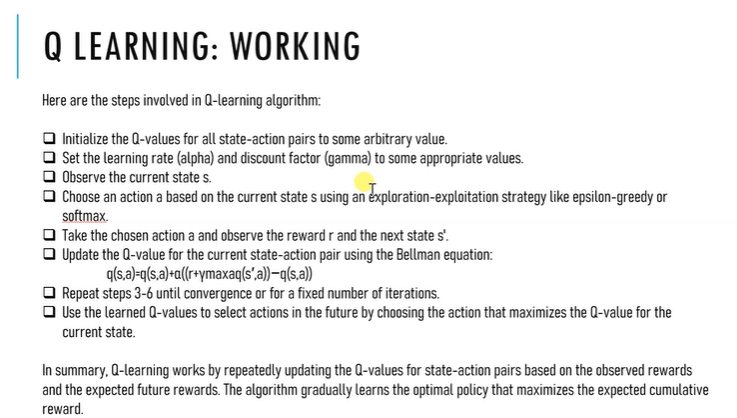


This code defines the rewards and transitions for a 4x4 gridworld environment, which can be used for Q-learning:

In [1]:

import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# The rows represent the states (0-3), and the columns represent the actions (0-3).
# The values in the array represent the reward for taking the corresponding action in the corresponding state.
# For example, taking action 3 (right) in state 0 results in a reward of 10.

In [2]:
#rewards The rows represent the states (0-3), and the columns represent the actions (0-3).
rewards = np.array([[-1,0,0,10],
                  [-1,0,0,10],
                   [-1,0,0,10],
                   [-1,0,0,0]
                   ])

#transition probabilities for next state The array has shape (4, 4, 4), where the first dimension 
# represents the current state, the second dimension represents the action taken, and the third dimension 
# represents the next state.
transitions = np.array([
    [[0.5, 0.5,0,0], [0.5, 0,0.5,0], [0, 0.5,0,0.5], [0, 0,1,0]],
    [[0, 1,0,0], [1, 0, 0 , 0], [0, 0 , 0.5, 0.5], [0,0,1,0]],
    [[0, 0, 0.5, 0.5], [0, 0.5,0, 0.5], [0, 0.5,0, 0.5], [0,0,1,0]],
    [[0,0,0,1], [0, 0, 0.5, 0.5], [0, 0.5, 0, 0.5], [0.5, 0.5, 0, 0]],
])

In [ ]:
# The transitions array defines the transition probabilities for each state-action pair:
    
# The array has shape (4, 4, 4), where the first dimension represents the current state, the second dimension represents the action taken, and the third dimension represents the next state.
# The values in the array represent the probability of transitioning from the current state to the next state when taking the specified action.
# For example, taking action 0 (up) in state 0 results in a 50% chance of staying in state 0 and a 50% chance of moving to state 1.
    

In [7]:
transitions.shape

(4, 4, 4)

In [3]:
n_states, n_actions, _ = transitions.shape

In [4]:
n_states

4

In [5]:
n_actions

4

In [6]:
_

4

In [39]:
q_table = np.zeros((n_states, n_actions))

In [40]:
q_table

array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]])

In [11]:
state = 0
done = False
total_reward = 0

In [12]:
epsilon = 0.1

In [ ]:
# Q-learning:
# To use this environment for Q-learning, you would:
# Initialize the Q-values for each state-action pair.
# Choose an action using an epsilon-greedy policy.
# Take the action and observe the next state and reward.
# Update the Q-value for the state-action pair using the Q-learning update rule.
# Repeat steps 2-4 until convergence or a maximum number of iterations.
# The Q-learning update rule is:
# Q(s, a) ← Q(s, a) + α * (r + γ * max(Q(s', a')) - Q(s, a))
# where:
# Q(s, a) is the current Q-value for state s and action a.
# α is the learning rate.
# r is the reward received.
# γ is the discount factor.
# s' is the next state.
# a' is the set of possible actions in the next state

This is a Python implementation of the Q-learning algorithm for a Markov Decision Process (MDP). Here's a breakdown of the code:

In [ ]:
# The function takes six inputs:
# transitions: A 3D array representing the transition probabilities between states.
# rewards: A 2D array representing the rewards for each state-action pair.
# gamma: The discount factor for future rewards.
# alpha: The learning rate for updating the Q-table.
# epsilon: The exploration rate for the epsilon-greedy policy.
# n_episodes: The number of episodes to run the Q-learning algorithm.

# The inner loop runs until the episode is complete (i.e., done is True).
# The agent starts in state 0 and accumulates rewards until it reaches the terminal state.

In [15]:
if np.random.rand()<epsilon:
    action = np.random.choice(n_actions)
else:
    action = np.argmax(q_table[state])

In [16]:
action

np.int64(0)

In [17]:
transitions[state, action]

array([0.5, 0.5, 0. , 0. ])

In [18]:
np.sum(transitions[state, action])

np.float64(1.0)

In [ ]:
# p=transitions[state, action]/np.sum(transitions[state, action]): Normalizes the transition probabilities to ensure they sum up to 1. This is necessary because the transition probabilities might not be perfectly normalized due to floating-point precision issues.
# np.random.choice(...): Selects a random next state based on the normalized transition probabilities.

In [19]:
p=transitions[state, action]/np.sum(transitions[state, action]) # normalization of probabilities

In [20]:
p

array([0.5, 0.5, 0. , 0. ])

In [33]:
np.random.choice(np.arange(n_states), p=transitions[state, action]/np.sum(transitions[state, action])) # among 1st and 2nd states 
# only 1st and 2nd states have higher probability

np.int64(1)

In [36]:
gamma = 0.9
alpha = 0.5
epsilon = 0.1

In [41]:
q_table[state, action] += alpha * (-1 + gamma * np.max(q_table[1]) - q_table[state, action])

In [42]:
q_table

array([[-0.5,  0. ,  0. ,  0. ],
       [ 0. ,  0. ,  0. ,  0. ],
       [ 0. ,  0. ,  0. ,  0. ],
       [ 0. ,  0. ,  0. ,  0. ]])

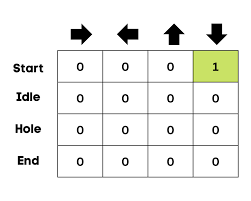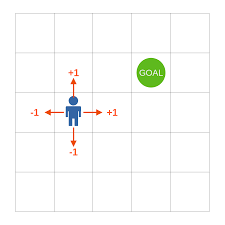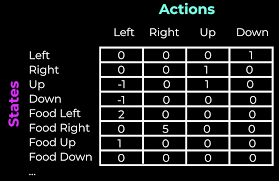

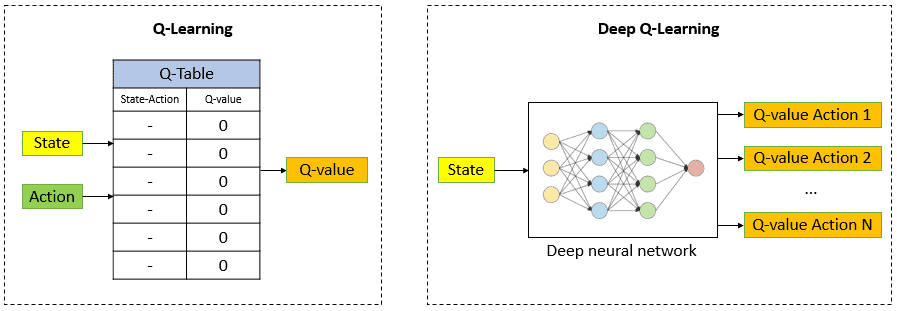
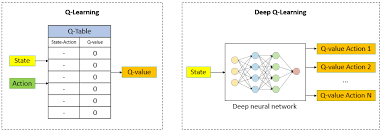

In [34]:
def q_learning(transitions, rewards, gamma, alpha, epsilon, n_episodes):
    n_states, n_actions, _ = transitions.shape
    q_table = np.zeros((n_states, n_actions))
    
    total_rewards = []
    for episode in range(n_episodes):
        print("Episodes", episode)
        state = 0
        print("state: ", state)
        done = False
        print("done: ", done)
        total_reward = 0
        while not done:
            if np.random.rand()<epsilon:
                action = np.random.choice(n_actions)
            else:
                action = np.argmax(q_table[state])
            print("action: ", action)
            # The agent transitions to a new state based on the transition probabilities.
            new_state = np.random.choice(np.arange(n_states), p=transitions[state, action]/np.sum(transitions[state, action]))
            print("new state: ", new_state)
            reward = rewards[state, action]
            print("reward: ", reward)
            # The agent updates the Q-table using the Q-learning update rule.
            q_table[state, action] += alpha * (reward + gamma * np.max(q_table[new_state]) - q_table[state, action])
            print("q_table: ", q_table)
            state = new_state  # set new state or current state as initial state
            total_reward += reward
            print("total_reward: ", total_reward)
            if state==n_states-1:
                done = True
        total_rewards.append(total_reward)
    print("total_reward for all  episod: ", total_rewards)

    
    plt.plot(total_rewards)
    plt.xlabel('Episodes')
    plt.ylabel('Total Reward')
    plt.show()
    
    return q_table

Episodes 0
state:  0
done:  False
action:  0
new state:  0
reward:  -1
q_table:  [[-0.5  0.   0.   0. ]
 [ 0.   0.   0.   0. ]
 [ 0.   0.   0.   0. ]
 [ 0.   0.   0.   0. ]]
total_reward:  -1
action:  1
new state:  2
reward:  0
q_table:  [[-0.5  0.   0.   0. ]
 [ 0.   0.   0.   0. ]
 [ 0.   0.   0.   0. ]
 [ 0.   0.   0.   0. ]]
total_reward:  -1
action:  3
new state:  2
reward:  10
q_table:  [[-0.5  0.   0.   0. ]
 [ 0.   0.   0.   0. ]
 [ 0.   0.   0.   5. ]
 [ 0.   0.   0.   0. ]]
total_reward:  9
action:  3
new state:  2
reward:  10
q_table:  [[-0.5   0.    0.    0.  ]
 [ 0.    0.    0.    0.  ]
 [ 0.    0.    0.    9.75]
 [ 0.    0.    0.    0.  ]]
total_reward:  19
action:  3
new state:  2
reward:  10
q_table:  [[-0.5     0.      0.      0.    ]
 [ 0.      0.      0.      0.    ]
 [ 0.      0.      0.     14.2625]
 [ 0.      0.      0.      0.    ]]
total_reward:  29
action:  3
new state:  2
reward:  10
q_table:  [[-0.5       0.        0.        0.      ]
 [ 0.        0.        0

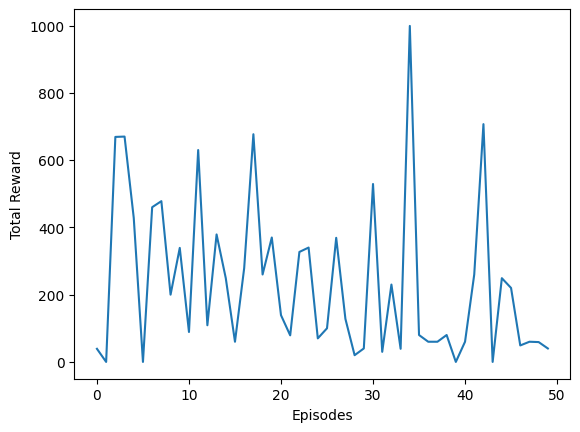

Converged Q Value [[ 37.14913939  79.29613009   0.         100.        ]
 [ 77.3799069   89.99999923  45.          50.        ]
 [ 15.49704999   9.66137314  10.41016671 100.        ]
 [  0.           0.           0.           0.        ]]


In [43]:
gamma = 0.9
alpha = 0.5
epsilon = 0.1
n_episodes = 50
q_table = q_learning(transitions, rewards, gamma, alpha, epsilon, n_episodes)


#Print
print("Converged Q Value", q_table)

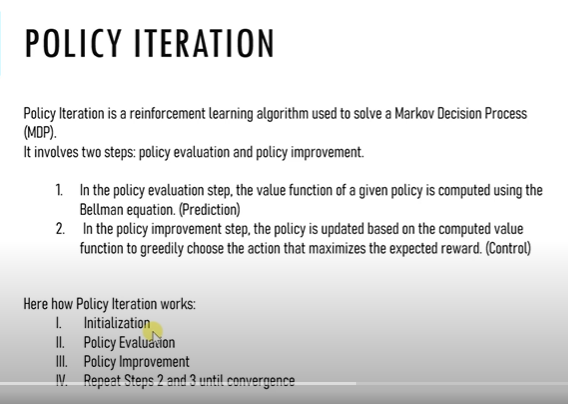

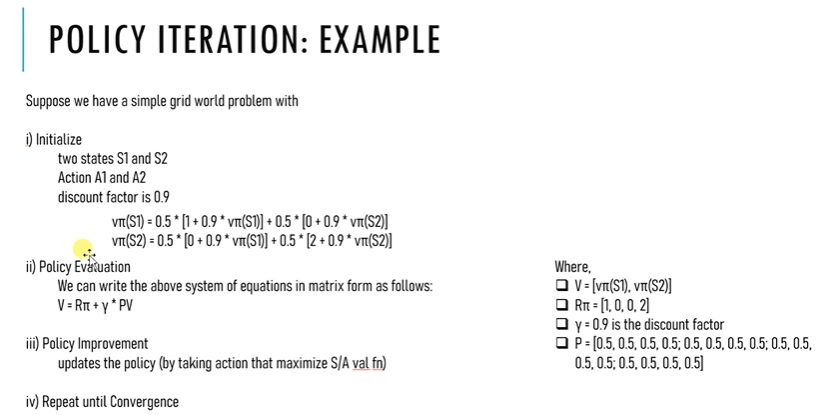

In [78]:
n_actions = 2
n_states = 2

rewards = np.zeros((n_states, n_actions, n_states))


In [79]:
rewards

array([[[0., 0.],
        [0., 0.]],

       [[0., 0.],
        [0., 0.]]])

In [80]:
for s in range(n_states):
    for a in range(n_actions):
        rewards[s,a, (s+a) % n_states] = 1

In [81]:
rewards  #rewards[s, a, next_s] represents the reward for taking action a in state s and transitioning to state next_s.


array([[[1., 0.],
        [0., 1.]],

       [[0., 1.],
        [1., 0.]]])

In [82]:
transitions = np.array([
    [[0.8, 0.2], [0.1, 0.9]],
    [[0.7, 0.3], [0.4, 0.6]],
    # [[0.6, 0.4], [0.3, 0.7]],
])
transitions

array([[[0.8, 0.2],
        [0.1, 0.9]],

       [[0.7, 0.3],
        [0.4, 0.6]]])

In [83]:
transitions.shape

(2, 2, 2)

In [84]:
n_states = transitions.shape[0]

In [85]:
n_states

2

In [86]:
n_actions = transitions.shape[1]

In [87]:
n_actions

2

In [88]:
policy = np.zeros(n_states, dtype=int)
v = np.zeros(n_states)

In [89]:
policy # action taken

array([0, 0])

In [90]:
v  # policy value

array([0., 0.])

In [91]:
gamma = 0.9

In [92]:
delta = 0

In [93]:
s = 0

In [94]:
v_old = v[s]

In [95]:
v_old

np.float64(0.0)

In [96]:
a = policy[s]

In [97]:
a

np.int64(0)

In [98]:
transitions[s,a,0]

np.float64(0.8)

In [99]:
rewards[s,a,0]

np.float64(1.0)

In [100]:
transitions[s,a,0] * (rewards[s,a,0] + gamma * v[0])

np.float64(0.8)

In [101]:
(transitions[s,a,s1] * (rewards[s,a,s1] + gamma * v[s1]) for s1 in range(n_states))

<generator object <genexpr> at 0x0000027716AB5120>

In [102]:
n_actions = 2
n_states = 2

rewards = np.zeros((n_states, n_actions, n_states))
for s in range(n_states):
    for a in range(n_actions):
        rewards[s,a, (s+a) % n_states] = 1

In [ ]:
# This code sets the rewards for a Markov Decision Process (MDP) with n_states states and n_actions actions:
# Reward Structure:
# The code defines a reward structure where:
# Taking action a in state s results in a reward of 1 when transitioning to the next state (s+a) % n_states.
# The % operator ensures that the next state wraps around to the beginning of the state space when the sum of s and a exceeds n_states-1.
# Reward Matrix:
# The rewards are stored in a 3D matrix rewards with shape (n_states, n_actions, n_states), where:
# rewards[s, a, next_s] represents the reward for taking action a in state s and transitioning to state next_s.
# Example:

In [72]:
rewards  
#The rewards are stored in a 3D matrix rewards with shape (n_states, n_actions, n_states), where:
# rewards[s, a, next_s] represents the reward for taking action a in state s and transitioning to state next_s.

array([[[1., 0.],
        [0., 1.]],

       [[0., 1.],
        [1., 0.]]])

In [ ]:
# rewards[0, 0, 1] = 1  # Taking action 0 in state 0 transitions to state 1 with reward 1
# rewards[0, 1, 2] = 1  # Taking action 1 in state 0 transitions to state 2 with reward 1


In [ ]:
# <!-- The transition probability matrix represents the probability of transitioning from one state to another when taking a specific action:
# The rows represent the current state.
# The columns represent the next state.
# The values in the matrix represent the probability of transitioning from the current state to the next state. -->

In [76]:
# n_states is the number of states in the MDP (2 in this case).
# n_actions is the number of actions available in each state (2 in this case).

In [77]:
transitions = np.array([
    [[0.8, 0.2], [0.1, 0.9]],
    [[0.7, 0.3], [0.4, 0.6]]
    # [[0.6, 0.4], [0.3, 0.7]],
])
transitions # transition probabilities to next state

array([[[0.8, 0.2],
        [0.1, 0.9]],

       [[0.7, 0.3],
        [0.4, 0.6]]])

In [105]:
policy # action taken

array([0, 1])

In [106]:
v  # state values

array([1.52072  , 1.3816192])

In [ ]:
# Initialize delta to 0, which tracks the maximum change in the value function.
# Iterate over all states s.
# For each state, compute the new value v[s] based on the current policy a=policy[s].
# Update delta with the maximum absolute difference between the old and new values.

In [ ]:
# Q-learning is a model-free reinforcement learning algorithm used to train agents to make decisions in complex, uncertain environments. Here's a step-by-step explanation of the Q-learning algorithm:
# Q-learning Algorithm:
# Initialize Q-table: Create a table to store the expected rewards for each state-action pair, initialized with arbitrary values.
# Choose an action: Select an action using an epsilon-greedy policy, which chooses the action with the highest Q-value with probability (1 - epsilon) and a random action with probability epsilon.
# Take the action: Execute the chosen action in the environment and observe the resulting next state and reward.
# Update Q-table: Update the Q-value for the state-action pair using the Q-learning update rule:
# Q(s, a) ← Q(s, a) + α * (r + γ * max(Q(s', a')) - Q(s, a))
# where:
# Q(s, a) is the current Q-value for the state-action pair.
# α is the learning rate.
# r is the reward received.
# γ is the discount factor.
# max(Q(s', a')) is the maximum Q-value for the next state.
# Repeat: Repeat steps 2-4 until convergence or a maximum number of iterations.

In [109]:
def policy_iter(transitions, rewards, gamma, n_states, n_actions):
    policy = np.zeros(n_states, dtype=int) # initiate policy for actions [0,0] among two acction 0,1
    print("policy: ", policy)
    v = np.zeros(n_states) # initial state value function for two states 0,1
    print("v: ", v)
    
    
    while True:
    #evaluation
        delta = 0
        for s in range(n_states):
            v_old = v[s] # value for state
            print("v: ", v_old)
            a = policy[s] # action for the state
            print("action: ", a)
            v[s] = sum(transitions[s,a,s1] * (rewards[s,a,s1] + gamma * v[s1]) for s1 in range(n_states)) # update value for 
            # next state transition in value function v
            print("v: ", v[s])
            delta = max(delta, abs(v_old-v[s])) # update delta if delta is greater than delta
            print("delta: ", delta)
        #improvement
        stable_policy = True
        for s in range(n_states):
            old_policy_val = policy
            old_policy = policy[s] # action for the state
            print("old policy: ", old_policy)
            q = np.zeros(n_actions) # initiate q table 
            print("q: ", q)
            for a in range(n_actions):
                q[s] = sum(transitions[s,a,s1] * (rewards[s,a,s1] + gamma * v[s1]) for s1 in range(n_states)) # update value for 
            # next state transition in q table
                print("q: ", q[a])
            policy[s] = np.argmax(q) # update action for the state with max q value in plolicy
            print("new policy: ", policy[s])

            if policy[s] != old_policy: # update action for the state is not same as old action
                stable_policy = False

        # if policy != old_policy_val:
        #     stable_policy = False
    
        if stable_policy:
            break
        
    #plot
    plt.plot(v)
    plt.title('Optimal Value Function')
    plt.xlabel('States')
    plt.ylabel('Value')
    plt.show()
    return policy, v

In [ ]:
# If the policy has not changed after a complete iteration, the algorithm terminates.
# The Policy Iteration algorithm iteratively improves the policy until convergence, resulting in an optimal policy for the MDP.

In [ ]:
# Initialize stable_policy to True, indicating whether the policy has changed.
# Iterate over all states s.
# For each state, compute the action-value function q for all possible actions.
# Update the policy policy[s] with the action that maximizes the action-value function.
# If the policy has changed, set stable_policy to False.

policy:  [0 0]
v:  [0. 0.]
v:  0.0
action:  0
v:  0.8
delta:  0.8
v:  0.0
action:  0
v:  0.804
delta:  0.804
old policy:  0
q:  [0. 0.]
q:  1.5207200000000003
q:  0.0
new policy:  0
old policy:  0
q:  [0. 0.]
q:  0.0
q:  1.12216
new policy:  1
v:  0.8
action:  0
v:  1.5207200000000003
delta:  0.7207200000000002
v:  0.804
action:  1
v:  1.3816192000000003
delta:  0.7207200000000002
old policy:  0
q:  [0. 0.]
q:  2.1436098560000003
q:  0.0
new policy:  0
old policy:  1
q:  [0. 0.]
q:  0.0
q:  1.6935335680000003
new policy:  1


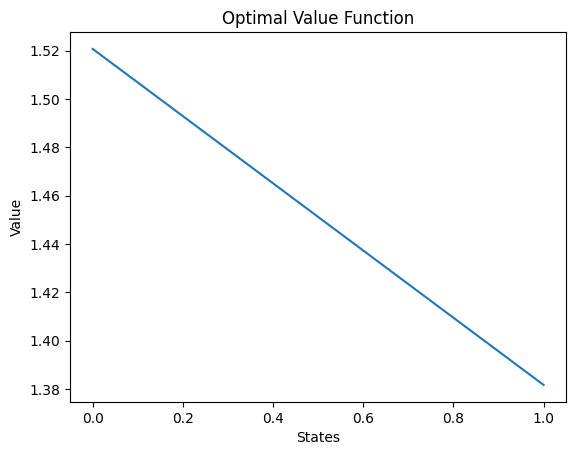

Converged Optimal Policy [0 1]
Converged value function [1.52072   1.3816192]


In [110]:
gamma = 0.9
policy, v = policy_iter(transitions, rewards, gamma, n_states, n_actions)
#Print
print("Converged Optimal Policy", policy)
print("Converged value function", v)

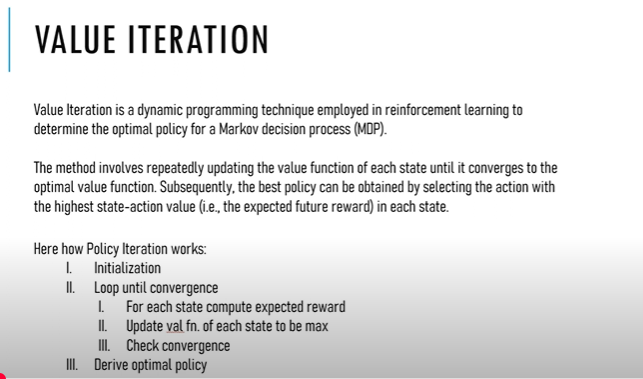

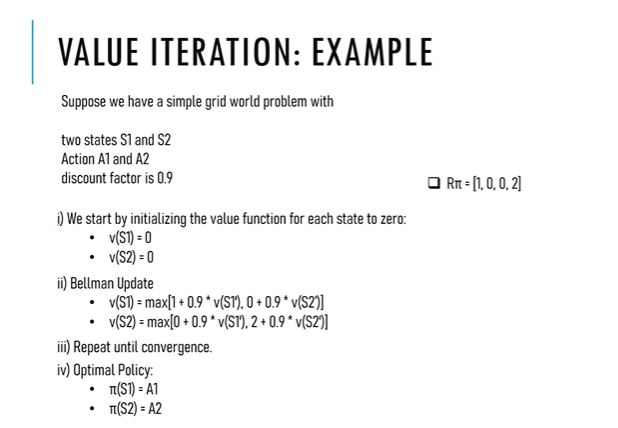

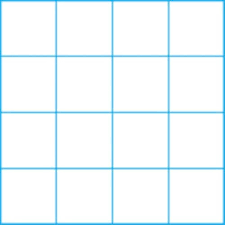

In [124]:
n_rows = 4
n_cols = 4
n_states = n_rows * n_cols
n_actions = 4

In [125]:
transitions = np.zeros((n_states,n_actions, n_states)) # state, action , next state transition probability
rewards = np.zeros((n_states,n_actions, n_states))
gamma = 0.9

In [126]:
transitions # state 16 (each grid), action 4 (up,down,left,right) , next state transition probability 16

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]])

In [127]:
rewards  

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]])

In [131]:
n_rows = 4
n_cols = 4
n_states = n_rows * n_cols
n_actions = 4
transitions = np.zeros((n_states,n_actions, n_states))
rewards = np.zeros((n_states,n_actions, n_states))
gamma = 0.9

In [128]:
for row in range(n_rows):
    for col in range(n_cols):
        s = row*n_cols+col  # state
        print(s)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15


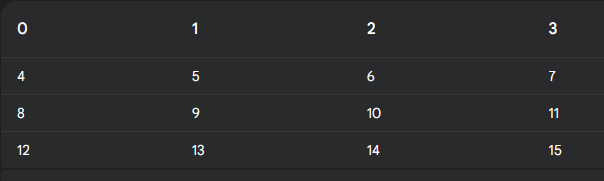

In [134]:
for row in range(n_rows):
    for col in range(n_cols):
        s = row*n_cols+col  # state
        print("state: " , s)
        for a in range(n_actions):
            if a ==0: #move up
                s1 = max(row-1, 0 ) * n_cols + col # next state up
                print("next state up: " ,s1)
            elif a ==1: #move down
                s1 = min(row+1, n_rows-1) * n_cols + col # next state down
                print("next state down: " , s1)
            elif a == 2: #move left
                s1 = row * n_cols + max(col-1, 0 ) # next state left
                print("next state left: " , s1)
            else: #move right
                s1 = row * n_cols + min(col+1, n_cols-1) # next state right
                print("next state right: " , s1)
                
            transitions[s,a,s1] = 1.0
            rewards[s,a,s1] = -1.0 if s1 != n_states-1 else 0.0

state:  0
next state up:  0
next state down:  4
next state left:  0
next state right:  1
state:  1
next state up:  1
next state down:  5
next state left:  0
next state right:  2
state:  2
next state up:  2
next state down:  6
next state left:  1
next state right:  3
state:  3
next state up:  3
next state down:  7
next state left:  2
next state right:  3
state:  4
next state up:  0
next state down:  8
next state left:  4
next state right:  5
state:  5
next state up:  1
next state down:  9
next state left:  4
next state right:  6
state:  6
next state up:  2
next state down:  10
next state left:  5
next state right:  7
state:  7
next state up:  3
next state down:  11
next state left:  6
next state right:  7
state:  8
next state up:  4
next state down:  12
next state left:  8
next state right:  9
state:  9
next state up:  5
next state down:  13
next state left:  8
next state right:  10
state:  10
next state up:  6
next state down:  14
next state left:  9
next state right:  11
state:  11
ne

In [135]:

transitions #state 16 (each grid), action 4 (up,down,left,right) , next state transition probability 16
# transition[0] for transition from 0 state , transition[1] for transition from 1 state , transition[2] for transition from 
# 2 state , transition[3] for transition from 3 state , transition[4] for transition from 4 state , transition[5] for transition from
# 5 state , transition[6] for transition from 6 state , transition[7] for transition from 7 state , transition[8] for transition from
# 8 state , transition[9] for transition from 9 state , transition[10] for transition from 10 state , transition[11] for transition from
# 11 state , transition[12] for transition from 12 state , transition[13] for transition from 13 state , transition[14] for transition from
# 14 state , transition[15] for transition from 15 state

array([[[1., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        [0., 1., 0., ..., 0., 0., 0.]],

       [[0., 1., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        [0., 0., 1., ..., 0., 0., 0.]],

       [[0., 0., 1., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 1., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 1., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 1., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 1., 0.],
        [0., 0., 0., ..., 1., 0., 0.],
        [0., 0., 0., ..., 0., 0., 1.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 1.],
        [0., 0., 0., ..., 0., 1., 0.],
        [0., 0., 0., ..., 0., 0., 1.]]])

In [137]:
transitions[0] # 4 rows for 4 actions and each element( 16 for 16 state) in rows representing a transition probability to next state
# like from 0 state can  transition to up 0 state , down 4 state , left 0 state , right 1 state 

array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [136]:

rewards # like above each transition state get a reward -1 for not target state (15) and 0 for target state 15

array([[[-1.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [-1.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0., -1.,  0., ...,  0.,  0.,  0.]],

       [[ 0., -1.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [-1.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0., -1., ...,  0.,  0.,  0.]],

       [[ 0.,  0., -1., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0., -1.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.]],

       ...,

       [[ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., -1.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0., -1.,  0.]],

       [[ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0., -1.,  0.],
        [ 0.,  0.,  0., ..., -1.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.]],

       [[ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.

In [144]:
v = np.zeros(n_states)
v_history = [v.copy()]
delta = 1

In [139]:
v # state value

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [140]:
v_history

[array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])]

In [ ]:
# This code is implementing the Value Iteration algorithm, a dynamic programming method for solving Markov Decision 
# Processes (MDPs)
# The algorithm iteratively updates the value function v for each state until convergence.
# The loop continues until the maximum change in the value function delta is less than a small threshold (1e-6).

# Initialize the Q-values q for each action a to 0.
# Compute the Q-value for each action a by summing over all possible next states s1:
# transitions[s,a,s1] is the transition probability from state s to state s1 under action a.
# rewards[s,a,s1] is the reward received when transitioning from state s to state s1 under action a.
# gamma * v[s1] is the discounted value of the next state s1.

In [145]:
while delta > 1e-6:
    delta = 0
    for s in range(n_states):
        print('state', s)
        v_old = v[s]  # initial state value
        print('state_value',v_old)
        q = np.zeros(n_actions) #  initialie q value for action 0,1,2,3 = up, down, left, right
        print('q', q) # initialize q value for each action to 0
        for a in range(n_actions):
            print('action', a)
            q[a] = sum(transitions[s,a,s1] * (rewards[s,a,s1] + gamma * v[s1]) for s1 in range(n_states)) # gamma * v[s1] is the discounted value of the next state s1.
            print('q[a]', q[a])
        print('q', q) # q value
        v[s] = np.max(q) # Update the value function v for state s to be the maximum Q-value over all actions.
        print('state_value', v[s]) # updated state value 
        delta = max(delta, abs(v_old-v[s]))
        print('delta', delta)
    v_history.append(v.copy())



state 0
state_value 0.0
q [0. 0. 0. 0.]
action 0
q[a] -1.0
action 1
q[a] -1.0
action 2
q[a] -1.0
action 3
q[a] -1.0
q [-1. -1. -1. -1.]
state_value -1.0
delta 1.0
state 1
state_value 0.0
q [0. 0. 0. 0.]
action 0
q[a] -1.0
action 1
q[a] -1.0
action 2
q[a] -1.9
action 3
q[a] -1.0
q [-1.  -1.  -1.9 -1. ]
state_value -1.0
delta 1.0
state 2
state_value 0.0
q [0. 0. 0. 0.]
action 0
q[a] -1.0
action 1
q[a] -1.0
action 2
q[a] -1.9
action 3
q[a] -1.0
q [-1.  -1.  -1.9 -1. ]
state_value -1.0
delta 1.0
state 3
state_value 0.0
q [0. 0. 0. 0.]
action 0
q[a] -1.0
action 1
q[a] -1.0
action 2
q[a] -1.9
action 3
q[a] -1.0
q [-1.  -1.  -1.9 -1. ]
state_value -1.0
delta 1.0
state 4
state_value 0.0
q [0. 0. 0. 0.]
action 0
q[a] -1.9
action 1
q[a] -1.0
action 2
q[a] -1.0
action 3
q[a] -1.0
q [-1.9 -1.  -1.  -1. ]
state_value -1.0
delta 1.0
state 5
state_value 0.0
q [0. 0. 0. 0.]
action 0
q[a] -1.9
action 1
q[a] -1.0
action 2
q[a] -1.9
action 3
q[a] -1.0
q [-1.9 -1.  -1.9 -1. ]
state_value -1.0
delta 1.0
st

In [146]:
v_history

[array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 array([-1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,  0., -1.,
        -1.,  0.,  0.]),
 array([-1.9, -1.9, -1.9, -1.9, -1.9, -1.9, -1.9, -1. , -1.9, -1.9, -1. ,
         0. , -1.9, -1. ,  0. ,  0. ]),
 array([-2.71, -2.71, -2.71, -1.9 , -2.71, -2.71, -1.9 , -1.  , -2.71,
        -1.9 , -1.  ,  0.  , -1.9 , -1.  ,  0.  ,  0.  ]),
 array([-3.439, -3.439, -2.71 , -1.9  , -3.439, -2.71 , -1.9  , -1.   ,
        -2.71 , -1.9  , -1.   ,  0.   , -1.9  , -1.   ,  0.   ,  0.   ]),
 array([-4.0951, -3.439 , -2.71  , -1.9   , -3.439 , -2.71  , -1.9   ,
        -1.    , -2.71  , -1.9   , -1.    ,  0.    , -1.9   , -1.    ,
         0.    ,  0.    ]),
 array([-4.0951, -3.439 , -2.71  , -1.9   , -3.439 , -2.71  , -1.9   ,
        -1.    , -2.71  , -1.9   , -1.    ,  0.    , -1.9   , -1.    ,
         0.    ,  0.    ])]

In [148]:
policy = np.zeros(n_states, dtype=int)

In [149]:
policy  # action 0,1,2,3 = up, down, left, right

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [150]:
#derive policy 
for s in range(n_states):
    print('state', s) # state
    q = np.zeros(n_actions) # initlize q values for each action
    for a in range(n_actions):
        q[a] = sum(transitions[s,a,s1] * (rewards[s,a,s1] + gamma * v[s1]) for s1 in range(n_states))
    policy[s] = np.argmax(q) # policy for action taken

state 0
state 1
state 2
state 3
state 4
state 5
state 6
state 7
state 8
state 9
state 10
state 11
state 12
state 13
state 14
state 15


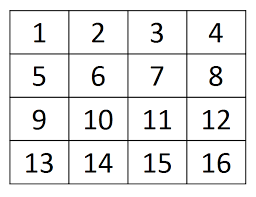

In [151]:
policy   #action 0,1,2,3 = up, down, left, right for 16 states

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 1])

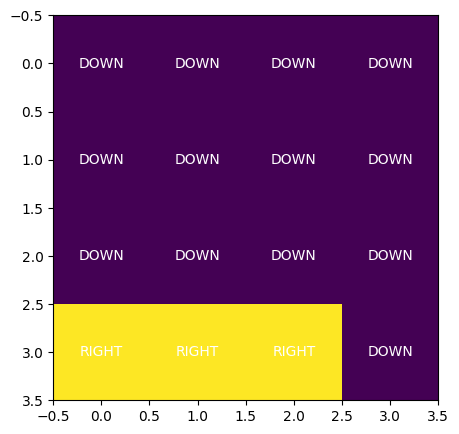

In [156]:
actions = ['UP', 'DOWN', 'LEFT', 'RIGHT']
plt.figure(figsize=(6,5))
plt.imshow(policy.reshape(n_rows, n_cols))
for row in range(n_rows):
    for col in range(n_cols):
        plt.text(col, row, actions[policy[row*n_cols + col]],
                color='white', ha='center', va='center')

In [154]:
def value_iteration(transitions, rewards, gamma, n_states, n_actions):
    v = np.zeros(n_states)
    v_history = [v.copy()]
    delta = 1
    
    #value iter loop:
    while delta > 1e-6:
        delta = 0
        for s in range(n_states):
            v_old = v[s]
            q = np.zeros(n_actions)
            for a in range(n_actions):
                q[a] = sum(transitions[s,a,s1] * (rewards[s,a,s1] + gamma * v[s1]) for s1 in range(n_states))
            v[s] = np.max(q)
            delta = max(delta, abs(v_old-v[s]))
        v_history.append(v.copy())

        
    #derive policy 
    policy = np.zeros(n_states, dtype=int)
    for s in range(n_states):
        q = np.zeros(n_actions)
        for a in range(n_actions):
            q[a] = sum(transitions[s,a,s1] * (rewards[s,a,s1] + gamma * v[s1]) for s1 in range(n_states))
        policy[s] = np.argmax(q)
    return policy, v, v_history

In [155]:
policy, v, v_history = value_iteration(transitions, rewards, gamma, n_states, n_actions)

In [158]:
v_history

[array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 array([-1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,  0., -1.,
        -1.,  0.,  0.]),
 array([-1.9, -1.9, -1.9, -1.9, -1.9, -1.9, -1.9, -1. , -1.9, -1.9, -1. ,
         0. , -1.9, -1. ,  0. ,  0. ]),
 array([-2.71, -2.71, -2.71, -1.9 , -2.71, -2.71, -1.9 , -1.  , -2.71,
        -1.9 , -1.  ,  0.  , -1.9 , -1.  ,  0.  ,  0.  ]),
 array([-3.439, -3.439, -2.71 , -1.9  , -3.439, -2.71 , -1.9  , -1.   ,
        -2.71 , -1.9  , -1.   ,  0.   , -1.9  , -1.   ,  0.   ,  0.   ]),
 array([-4.0951, -3.439 , -2.71  , -1.9   , -3.439 , -2.71  , -1.9   ,
        -1.    , -2.71  , -1.9   , -1.    ,  0.    , -1.9   , -1.    ,
         0.    ,  0.    ]),
 array([-4.0951, -3.439 , -2.71  , -1.9   , -3.439 , -2.71  , -1.9   ,
        -1.    , -2.71  , -1.9   , -1.    ,  0.    , -1.9   , -1.    ,
         0.    ,  0.    ])]

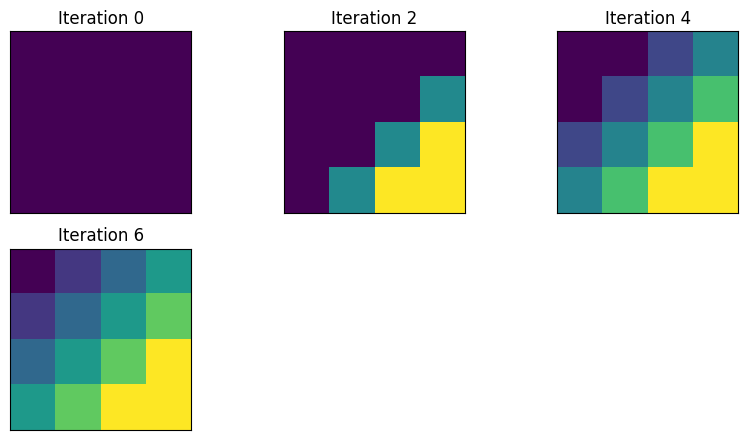

<module 'matplotlib.pyplot' from 'd:\\a27_YEARS_OLD\\rainforcement_learning\\venv\\Lib\\site-packages\\matplotlib\\pyplot.py'>

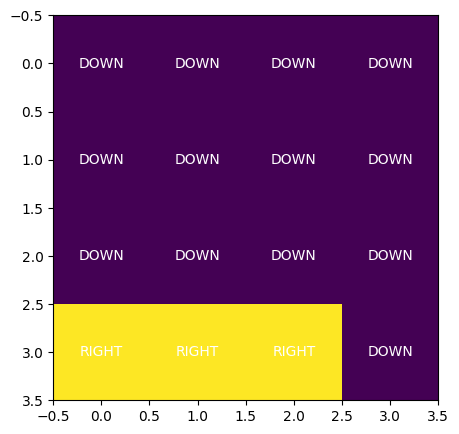

In [157]:
plt.figure(figsize=(10, 8))
for i in range(0, len(v_history), 2):
    plt.subplot(3,3, int(i/2+1))
    plt.imshow(v_history[i].reshape(n_rows, n_cols))
    plt.title('Iteration {}'.format(i))
    plt.xticks([])
    plt.yticks([])
plt.show()

actions = ['UP', 'DOWN', 'LEFT', 'RIGHT']
plt.figure(figsize=(6,5))
plt.imshow(policy.reshape(n_rows, n_cols))
for row in range(n_rows):
    for col in range(n_cols):
        plt.text(col, row, actions[policy[row*n_cols + col]],
                color='white', ha='center', va='center')
plt

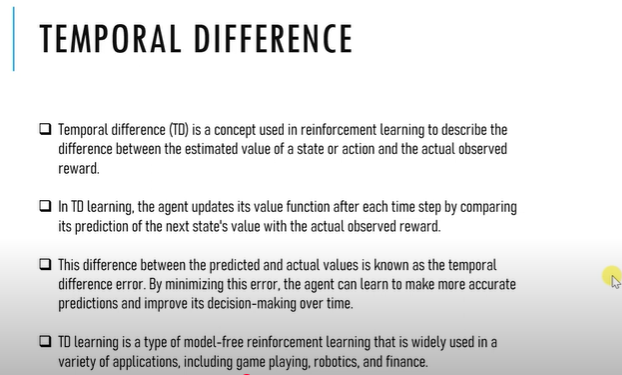

<!-- https://www.youtube.com/watch?v=Aakv6m--W6U&list=PL_Ke9hJMFeR9Kos7VtiPPiPp9Y16sA7Ef&index=32 -->